In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload() # Commented out for privacy

Saving kaggle-4.json to kaggle-4.json


{'kaggle-4.json': b'{"username":"ray0911","key":"7e734715b127af6053c1a48387c496e9"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle-4.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujaradha/thermal-images-diseased-healthy-leaves-paddy")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sujaradha/thermal-images-diseased-healthy-leaves-paddy/versions/2


In [5]:
!cp -r /root/.cache/kagglehub/datasets/sujaradha/thermal-images-diseased-healthy-leaves-paddy/versions/2 /content/paddy-leaves

The following is done using pytorch 

In [6]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms

In [7]:
print("GPU : ", torch.cuda.is_available())

GPU :  True


In [8]:
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use GPU if available
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")  # Use CPU if no GPU
    print("CUDA is not available. Using CPU.")


CUDA is available. Using GPU.


Loading Dataset To determine the parameters for normalising our image data.

- for rgb usually : (0.5,0.5,0.5)

In [9]:
from PIL import Image
import os
from tqdm import tqdm

# Inspecting Dataset

In [10]:
from PIL import Image
import numpy as np

# Open the image using PIL
img_path = '/content/paddy-leaves/thermal images UL/Blast/Thermalimage10a.jpg'
img = Image.open(img_path)

# Check the mode of the image (e.g., 'L' for grayscale, 'RGB' for color)
print(f"Image mode: {img.mode}")

# Convert the image to a NumPy array to inspect the pixel values
img_array = np.array(img)

# Check the data type and range of the image
print(f"Data type: {img_array.dtype}")
print(f"Min pixel value: {img_array.min()}")
print(f"Max pixel value: {img_array.max()}")


Image mode: RGB
Data type: uint8
Min pixel value: 0
Max pixel value: 255


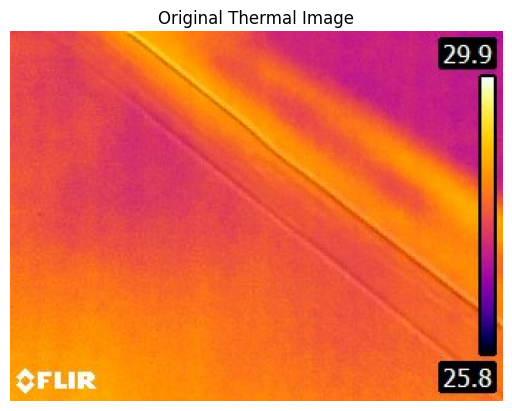

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/paddy-leaves/thermal images UL/Blast/Thermalimage10a.jpg'  # Your image path
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.title("Original Thermal Image")
plt.axis('off')  # Turn off axis labels
plt.show()


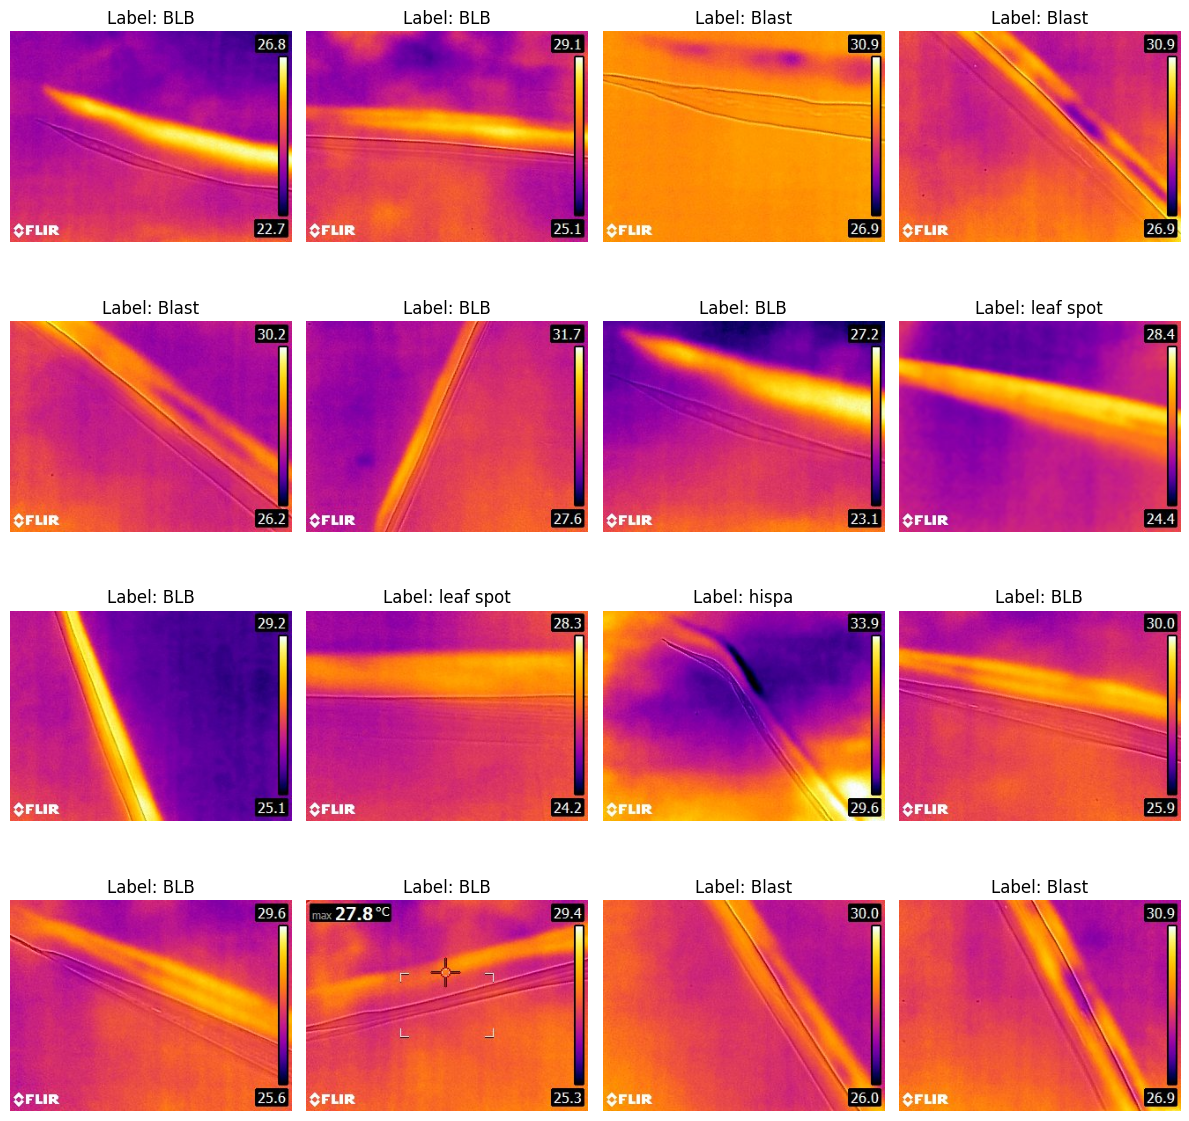

In [12]:
import random
import matplotlib.pyplot as plt
from torchvision import datasets

random.seed(42)
dataset_path = '/content/paddy-leaves/thermal images UL'
dataset = datasets.ImageFolder(root=dataset_path)

random_indices = random.sample(range(len(dataset)), 16)

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, idx in enumerate(random_indices):
    # Load the image and its label
    img, label = dataset[idx]

    # Convert the image to NumPy for visualization
    img_np = img

    # Get the class label
    label_name = dataset.classes[label]

    # Display the image in the grid
    ax = axes[i // 4, i % 4]  # Determine the position in the grid
    ax.imshow(img_np)
    ax.set_title(f"Label: {label_name}")
    ax.axis('off')  

# Adjustinng Grid
plt.tight_layout()
plt.show()


In [14]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128 (or any desired size)
    transforms.ToTensor(),  # Convert to tensor and scale [0, 1]
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.05, 0.5])  # Apply normalization per channel
])

In [15]:
from torchvision import datasets, transforms
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

In [16]:
# Access a single image and its label to inspect the shape
img, label = dataset[0]
print(f"Image shape: {img.shape}")  # format: torch.Size([C, H, W])
print(f"Image shape as torch.Tensor: {img.shape}")  

Image shape: torch.Size([3, 128, 128])
Image shape as torch.Tensor: torch.Size([3, 128, 128])


In [17]:
img_path = '/content/paddy-leaves/thermal images UL/BLB/thermalimage100a.jpg'
img = Image.open(img_path)
print(f"Image size: {img.size}")  # (width, height)

Image size: (320, 240)


In [19]:
import os
from PIL import Image

# Path to the directory containing the subfolders (healthy, hispa leaf, etc.)
dataset_path = '/content/paddy-leaves/thermal images UL'

# Iterate through the images in the dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        # Only process image files (you can add more image formats as needed)
        if file.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(root, file)

            # Open the image using PIL
            img = Image.open(img_path)

            # Get the image size (width, height)
            img_size = img.size

            # Check if the image size matches (320, 240)
            if img_size != (320, 240):
                print(f"{img_path} has different  size: {img_size}")



In [20]:
# Path to your specific image
img_path = '/content/paddy-leaves/thermal images UL/BLB/thermalimage100a.jpg'

# Open the image using PIL
img = Image.open(img_path)

# Show the size (width, height)
print(f"Image size: {img.size}")  # (width, height)

Image size: (320, 240)


# Deciding whether I should resize up or down

Resized image to (128, 128): (128, 128)


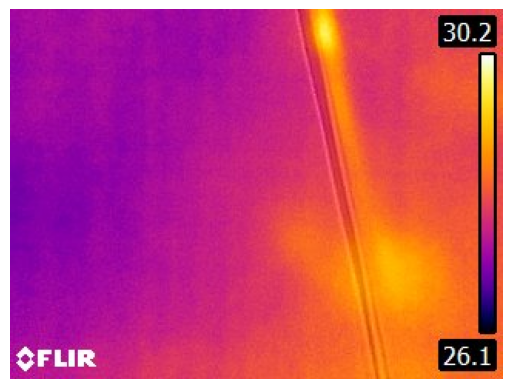

Resized image to (256, 256): (256, 256)


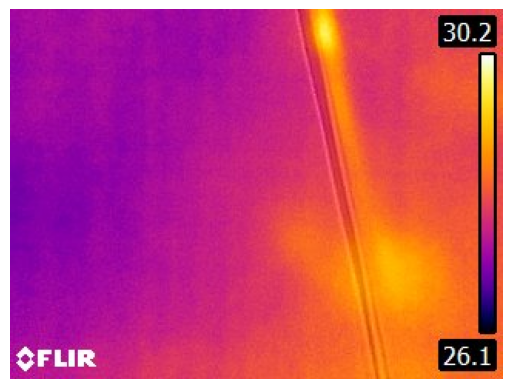

Resized image to (320, 240): (320, 240)


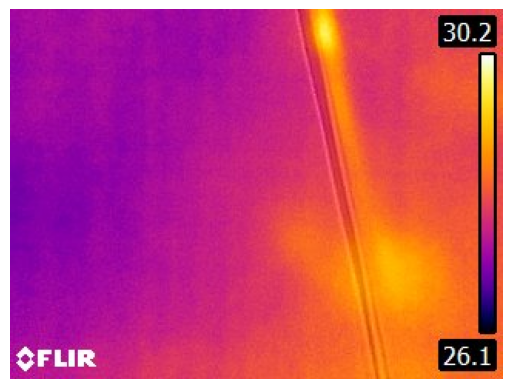

Resized image to (512, 512): (512, 512)


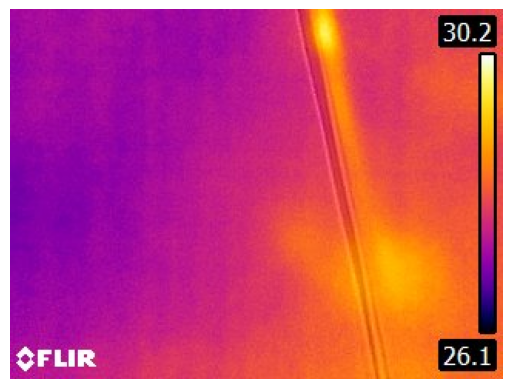

In [21]:
from PIL import Image
# Picking the correct dimension
img_path = '/content/paddy-leaves/thermal images UL/BLB/thermalimage100a.jpg'

# Open the image using PIL
img = Image.open(img_path)

# Define the sizes you want to resize to
sizes = [(128, 128), (256, 256), (320, 240), (512, 512)]

# Loop through the sizes, resize the image, and print the size
for size in sizes:
    resized_img = img.resize(size)
    print(f"Resized image to {size}: {resized_img.size}")
    resized_imgimg = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()



- 512x512: Ideal if you're working with high-detail thermal images and can afford the computational overhead. This will capture the most detailed temperature differences.
- 320x240: Good balance between detail and computational cost, making it suitable for many tasks involving thermal analysis.
- 128x128: the temperature variation in the images may be subtle, worry loosing out detail


In [22]:
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Chose to Increase as thermal
    transforms.ToTensor(),  # Convert to tensor and scale [0, 1]
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.05, 0.5])  # Apply normalization per channel
])
from torchvision import datasets, transforms
dataset_path = '/content/paddy-leaves/thermal images UL'
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

In [23]:
img, label = dataset[0]
print(f"Image shape: {img.shape}")  # Format: torch.Size([C, H, W])
print(f"Image shape as torch.Tensor: {img.shape}")  # Will show tensor shape like torch.Size([3, 128, 128])

Image shape: torch.Size([3, 512, 512])
Image shape as torch.Tensor: torch.Size([3, 512, 512])


# Detected Image Imbalance

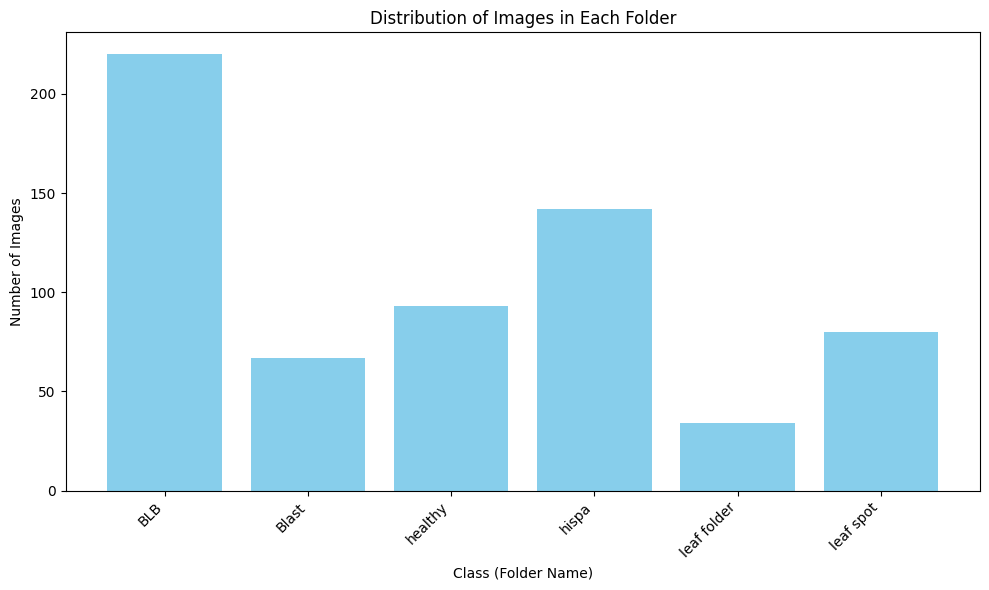

In [24]:
class_names = dataset.classes
class_counts = [0] * len(class_names)

# Count images in each class (folder)
for _, label in dataset.samples:
    class_counts[label] += 1

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class (Folder Name)')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Each Folder')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#S hows Imbalance in data

# Resampling the Dataset:
- Oversampling the Minority Classes: This involves duplicating examples from underrepresented classes to balance the dataset.
- Undersampling the Majority Classes: You can randomly sample fewer examples from the majority classes to make the dataset more balanced.
- SMOTE 

- For this , I am using weighted random sampler to augment databased on how frequent each class was present, to better balance the data categories.

In [25]:
# Get class distribution
class_counts = torch.bincount(torch.tensor(dataset.targets))
print("Class distribution:", class_counts)

Class distribution: tensor([220,  67,  93, 142,  34,  80])


In [26]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(15),      # Randomly rotate images by 15 degrees
    transforms.Resize((512, 512)),      
    transforms.ToTensor(),              # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])
#Not doing color jitter as may distort temp differences

In [27]:
# Load the dataset using ImageFolder with the transform (including augmentation)
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler



In [28]:
class_counts = torch.bincount(torch.tensor(dataset.targets))
print("Class distribution:", class_counts)


Class distribution: tensor([220,  67,  93, 142,  34,  80])


In [29]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.utils.data.sampler import WeightedRandomSampler
from collections import Counter

class_counts = torch.bincount(torch.tensor(dataset.targets))
print("Class distribution:", class_counts)
total_samples = len(dataset)
max_class_count = class_counts.max().item()
class_weights = [max_class_count / count for count in class_counts]
print("Class weights:", class_weights)

# Create a weighted random sampler
weights = torch.tensor([class_weights[label] for label in dataset.targets])
sampler = WeightedRandomSampler(weights, num_samples=total_samples, replacement=True)

# Create DataLoader using the sampler
dataloader = DataLoader(dataset, batch_size=16, sampler=sampler)

# Check a few batches
batch_counts = Counter()
for i, (images, labels) in enumerate(dataloader):
    batch_counts.update(labels.numpy())  
    if i == 5:
        break  # Limit to 5 batches for checking

print("Batch class counts:", batch_counts)


Class distribution: tensor([220,  67,  93, 142,  34,  80])
Class weights: [tensor(1.0000), tensor(3.2836), tensor(2.3656), tensor(1.5493), tensor(6.4706), tensor(2.7500)]
Batch class counts: Counter({2: 23, 1: 20, 3: 16, 4: 13, 0: 12, 5: 12})


In [30]:
original_dataset_size = len(dataset)
augmentations_per_image = 5  
# Effective dataset size (original images + augmentations)
effective_dataset_size = original_dataset_size * augmentations_per_image
print(f"Original dataset size: {original_dataset_size}")
print(f"Effective dataset size after augmentation: {effective_dataset_size}")


Original dataset size: 636
Effective dataset size after augmentation: 3180


Image count increased - more variations

In [31]:
import torch
from torch.utils.data import random_split

total_samples = len(dataset)

# Define the sizes for the splits (70% train, 15% validation, 15% test)
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size  # Remaining samples for test

# Split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Training set size: 445
Validation set size: 95
Test set size: 96


In [32]:
from torch.utils.data import DataLoader

# Create DataLoaders for each split
train_dataloader = DataLoader(train_dataset, batch_size=32,shuffle=True)  
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)  
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)  




In [33]:
print(f"Dataset size: {len(dataset)}")


Dataset size: 636


In [34]:
for idx in range(len(dataset)):
    img, label = dataset[idx]
    print(f"Sample {idx}: {img.size}, Label: {label}")


Sample 0: <built-in method size of Tensor object at 0x7bb14cf9b010>, Label: 0
Sample 1: <built-in method size of Tensor object at 0x7bb14cf83f10>, Label: 0
Sample 2: <built-in method size of Tensor object at 0x7bb14cf9b010>, Label: 0
Sample 3: <built-in method size of Tensor object at 0x7bb231b2e930>, Label: 0
Sample 4: <built-in method size of Tensor object at 0x7bb14cf9b010>, Label: 0
Sample 5: <built-in method size of Tensor object at 0x7bb1601a8c20>, Label: 0
Sample 6: <built-in method size of Tensor object at 0x7bb14cf9a160>, Label: 0
Sample 7: <built-in method size of Tensor object at 0x7bb14cf9b010>, Label: 0
Sample 8: <built-in method size of Tensor object at 0x7bb1601a8c20>, Label: 0
Sample 9: <built-in method size of Tensor object at 0x7bb14cf9a160>, Label: 0
Sample 10: <built-in method size of Tensor object at 0x7bb14cf9b010>, Label: 0
Sample 11: <built-in method size of Tensor object at 0x7bb14cfbf790>, Label: 0
Sample 12: <built-in method size of Tensor object at 0x7bb14cf

In [35]:
for batch_idx, (images, labels) in enumerate(train_dataloader):
    print(f"Batch index: {batch_idx}, Images batch shape: {images.size()}, Labels batch: {labels}")
    break


Batch index: 0, Images batch shape: torch.Size([32, 3, 512, 512]), Labels batch: tensor([0, 2, 2, 3, 0, 3, 5, 0, 0, 0, 3, 1, 0, 3, 0, 1, 0, 0, 0, 2, 0, 3, 0, 3,
        0, 5, 1, 0, 2, 4, 5, 3])


# Transfer learning and Finetuning model 

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets

# Early Stopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Fine-tune the model (adjust last layers)
def fine_tune_resnet50(num_classes):
    # Load a pretrained ResNet50 model
    model = models.resnet50(pretrained=True)

    # Freeze all layers except the final fully connected layer
    for param in model.parameters():
        param.requires_grad = False

    # Replace the final fully connected layer for your number of classes
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    # Unfreeze the last few layers to fine-tune
    for param in model.fc.parameters():
        param.requires_grad = True

    return model

To add momentum to the optimizer in your code modify the Adam optimizer to use a different optimizer that supports momentum, such as SGD

In [37]:
model = fine_tune_resnet50(num_classes=6)  # 6 labels

# Loss function
criterion = nn.CrossEntropyLoss()

# Use SGD optimizer with momentum (added momentum of 0.9)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Learning rate scheduler (optional, to reduce lr during training)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Early stopping
early_stopping = EarlyStopping(patience=3, min_delta=0.01)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [38]:
# Initialize lists to store loss and accuracy to plot later
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
all_predictions = []
all_labels = []

In [39]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataloader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    print(f"Epoch {epoch+1}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    epoch_preds = []
    epoch_labels = []
    with torch.no_grad():
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Accumulate validation loss
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Save predictions and labels for later evaluation
            epoch_preds.extend(predicted.cpu().numpy())
            epoch_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_dataloader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Early stopping check
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered. Training stopped.")
        break

    scheduler.step()

    # Append validation predictions and labels for classification report
    all_predictions.extend(epoch_preds)
    all_labels.extend(epoch_labels)

Epoch 1, Train Loss: 1.7373, Train Accuracy: 0.2989
Validation Loss: 1.7839, Validation Accuracy: 0.1789
Epoch 2, Train Loss: 1.6263, Train Accuracy: 0.3169
Validation Loss: 1.7726, Validation Accuracy: 0.2842
Epoch 3, Train Loss: 1.5450, Train Accuracy: 0.4607
Validation Loss: 1.6818, Validation Accuracy: 0.3684
Epoch 4, Train Loss: 1.4686, Train Accuracy: 0.4921
Validation Loss: 1.5792, Validation Accuracy: 0.3263
Epoch 5, Train Loss: 1.4402, Train Accuracy: 0.4517
Validation Loss: 1.5904, Validation Accuracy: 0.3789
Epoch 6, Train Loss: 1.4080, Train Accuracy: 0.4539
Validation Loss: 1.5016, Validation Accuracy: 0.3684
Epoch 7, Train Loss: 1.3618, Train Accuracy: 0.4629
Validation Loss: 1.5109, Validation Accuracy: 0.3053
Epoch 8, Train Loss: 1.3467, Train Accuracy: 0.4494
Validation Loss: 1.4850, Validation Accuracy: 0.3789
Epoch 9, Train Loss: 1.3215, Train Accuracy: 0.5169
Validation Loss: 1.4745, Validation Accuracy: 0.4000
Epoch 10, Train Loss: 1.3183, Train Accuracy: 0.5146
Va

- Used Resnet50 - simpler version 
- training to 100 epoch as thermal dataset features are compplex
- using batch of train dataloader ,backpropogate model weights, acculumate loss and calcuate accuracy and adjusted the learning rate accordingly
- after training done it uses the validation data to see how it performs on unseen - generalisation
- Here, the gap between validation accuracy and train is quite large as well as validation loss doesnt decrease suggesting overfitting.
- I also dont think it was capturing any relevant features - (need to use feature extraction before model training)

Switched to resnet101 - more complex features 

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets

# Early Stopping class
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Fine-tune the model (adjust last layers and unfreeze more layers)
def fine_tune_resnet101(num_classes):
    # Load a pretrained ResNet101 model
    model = models.resnet101(pretrained=True)

    # Freeze all layers except the final fully connected layer and some initial layers
    for param in model.parameters():
        param.requires_grad = False

    # Unfreeze the last few layers to fine-tune
    for param in model.layer4.parameters():
        param.requires_grad = True

    # Replace the final fully connected layer for your number of classes
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    # Unfreeze the final fully connected layer
    for param in model.fc.parameters():
        param.requires_grad = True

    return model

#

# Initialize the model
model = fine_tune_resnet101(num_classes=6)  # Assuming 6 classes as per your dataset

# Loss function
criterion = nn.CrossEntropyLoss()

# Use SGD optimizer with momentum and weight decay for regularization
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Early stopping
early_stopping = EarlyStopping(patience=3, min_delta=0.01)

# Initialize lists to store loss and accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
all_predictions = []
all_labels = []

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataloader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    print(f"Epoch {epoch+1}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    epoch_preds = []
    epoch_labels = []
    with torch.no_grad():
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Accumulate validation loss
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Save predictions and labels for later evaluation
            epoch_preds.extend(predicted.cpu().numpy())
            epoch_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_dataloader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Early stopping check
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered. Training stopped.")
        break
    scheduler.step()

    # Append validation predictions and labels for classification report
    all_predictions.extend(epoch_preds)
    all_labels.extend(epoch_labels)


Epoch 1, Train Loss: 1.6860, Train Accuracy: 0.3034
Validation Loss: 1.7276, Validation Accuracy: 0.2000
Epoch 2, Train Loss: 1.5451, Train Accuracy: 0.3371
Validation Loss: 1.6336, Validation Accuracy: 0.3158
Epoch 3, Train Loss: 1.4309, Train Accuracy: 0.4562
Validation Loss: 1.5186, Validation Accuracy: 0.4000
Epoch 4, Train Loss: 1.3480, Train Accuracy: 0.5124
Validation Loss: 1.4200, Validation Accuracy: 0.4105
Epoch 5, Train Loss: 1.2453, Train Accuracy: 0.4944
Validation Loss: 1.3492, Validation Accuracy: 0.3789
Epoch 6, Train Loss: 1.1527, Train Accuracy: 0.5640
Validation Loss: 1.2518, Validation Accuracy: 0.5053
Epoch 7, Train Loss: 1.0497, Train Accuracy: 0.5663
Validation Loss: 1.1544, Validation Accuracy: 0.5789
Epoch 8, Train Loss: 0.9961, Train Accuracy: 0.6584
Validation Loss: 1.0792, Validation Accuracy: 0.5789
Epoch 9, Train Loss: 0.9594, Train Accuracy: 0.6427
Validation Loss: 1.0827, Validation Accuracy: 0.6105
Epoch 10, Train Loss: 0.9421, Train Accuracy: 0.6472
Va

Overfitting a lot (valudation accuracy nad loss doesnt improve even tbough train accuracy improving) => decided to use normalisation techniques below:

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets

# Early Stopping class (updated with patience 4)
class EarlyStopping:
    def __init__(self, patience=4, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Fine-tune the model (adjust last layers and unfreeze more layers)
def fine_tune_resnet101(num_classes):
    # Load a pretrained ResNet101 model
    model = models.resnet101(pretrained=True)

    # Freeze all layers except the final fully connected layer and some initial layers
    for param in model.parameters():
        param.requires_grad = False

    # Unfreeze the last few layers to fine-tune
    for param in model.layer4.parameters():
        param.requires_grad = True

    # Replace the final fully connected layer for your number of classes
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    # Unfreeze the final fully connected layer
    for param in model.fc.parameters():
        param.requires_grad = True

    # Add Batch Normalization after the fully connected layer (optional)
    model.fc = nn.Sequential(
        model.fc,
        nn.BatchNorm1d(num_classes)  # Add batch normalization after the final layer
    )

    return model



# Initialize the model
model = fine_tune_resnet101(num_classes=6)  
# Loss function
criterion = nn.CrossEntropyLoss()

params_with_l2 = []
params_without_l2 = []

for name, param in model.named_parameters():
    if 'layer4' in name or 'fc' in name:  # Apply L2 regularization to layer4 and fc layers
        params_with_l2.append(param)
    else:
        params_without_l2.append(param)

# Optimizer with L2 regularization (weight decay for final layers and other parts of the model)
optimizer = optim.SGD(
    [
        {'params': params_with_l2, 'weight_decay': 1e-4},  # L2 regularization
        {'params': params_without_l2, 'weight_decay': 0}  # No L2 for other layers
    ],
    lr=0.001,
    momentum=0.9
)

# Learning rate scheduler (optional, to reduce lr during training)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Early stopping
early_stopping = EarlyStopping(patience=4, min_delta=0.01)

# Initialize lists to store loss and accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
all_predictions = []
all_labels = []

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataloader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    print(f"Epoch {epoch+1}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_acc:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    epoch_preds = []
    epoch_labels = []
    with torch.no_grad():
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Accumulate validation loss
            val_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Save predictions and labels for later evaluation
            epoch_preds.extend(predicted.cpu().numpy())
            epoch_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_dataloader)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Early stopping check
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered. Training stopped.")
        break

    # Scheduler step (optional)
    scheduler.step()

    # Append validation predictions and labels for classification report
    all_predictions.extend(epoch_preds)
    all_labels.extend(epoch_labels)


Epoch 1, Train Loss: 1.4942, Train Accuracy: 0.4629
Validation Loss: 1.5593, Validation Accuracy: 0.4526
Epoch 2, Train Loss: 1.0884, Train Accuracy: 0.6517
Validation Loss: 1.3070, Validation Accuracy: 0.6211
Epoch 3, Train Loss: 0.9283, Train Accuracy: 0.7596
Validation Loss: 0.9600, Validation Accuracy: 0.7895
Epoch 4, Train Loss: 0.8514, Train Accuracy: 0.7888
Validation Loss: 0.8828, Validation Accuracy: 0.8211
Epoch 5, Train Loss: 0.7557, Train Accuracy: 0.8472
Validation Loss: 0.8627, Validation Accuracy: 0.8421
Epoch 6, Train Loss: 0.6951, Train Accuracy: 0.8697
Validation Loss: 0.8096, Validation Accuracy: 0.8526
Epoch 7, Train Loss: 0.6634, Train Accuracy: 0.9011
Validation Loss: 0.8198, Validation Accuracy: 0.8632
Epoch 8, Train Loss: 0.6309, Train Accuracy: 0.9011
Validation Loss: 0.7010, Validation Accuracy: 0.8947
Epoch 9, Train Loss: 0.6253, Train Accuracy: 0.9236
Validation Loss: 0.7724, Validation Accuracy: 0.8632
Epoch 10, Train Loss: 0.5946, Train Accuracy: 0.9101
Va

D: pls dont overfit

90% accuracy on train . Performed much better

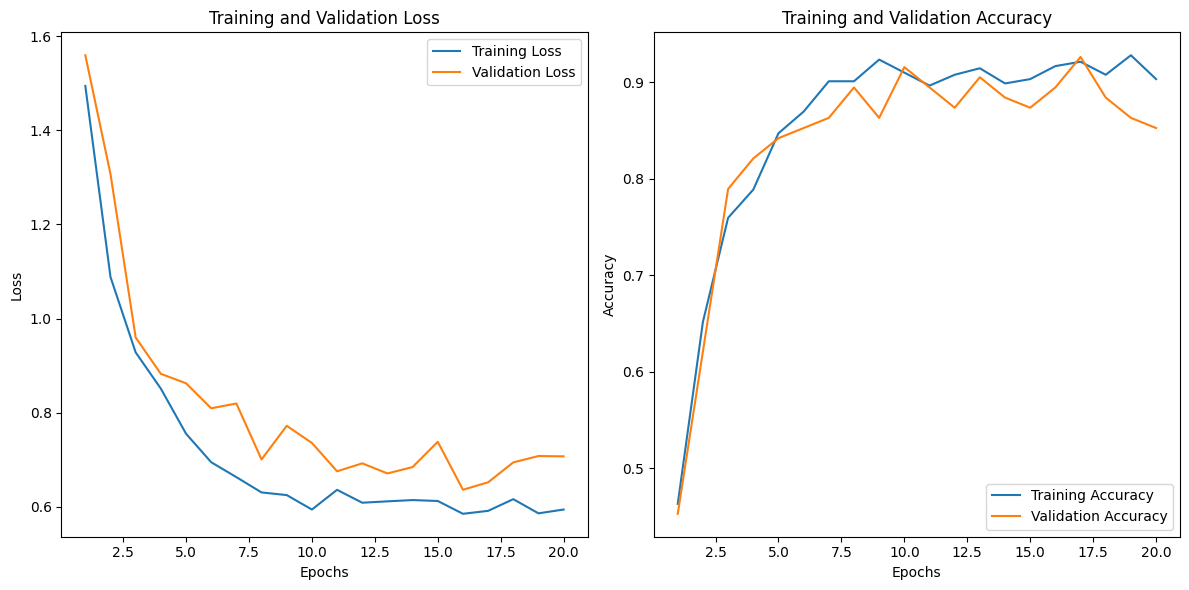

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# After the training loop ends, plot loss and accuracy graphs

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       513
           1       0.74      0.92      0.82       304
           2       0.94      0.83      0.89       399
           3       0.88      0.77      0.82       323
           4       0.66      0.95      0.78       133
           5       0.78      0.87      0.83       133

    accuracy                           0.84      1805
   macro avg       0.82      0.86      0.83      1805
weighted avg       0.85      0.84      0.84      1805



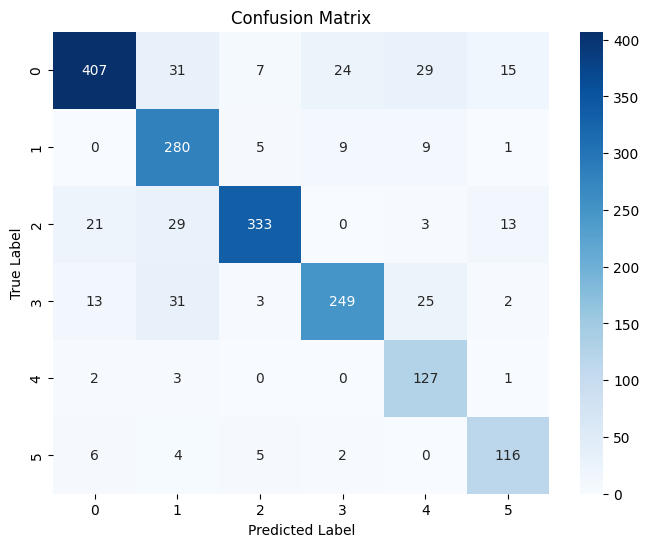

In [55]:
# Generate the classification report and confusion matrix
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(6), yticklabels=range(6))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [57]:
model.eval()  
test_loss = 0.0
test_correct = 0
test_total = 0
test_preds = []
test_labels = []

with torch.no_grad():  
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Accumulate test loss
        test_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        # Store predictions and labels for further evaluation
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Calculate final test loss and accuracy
test_loss = test_loss / len(test_dataloader)
test_acc = test_correct / test_total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Test Loss: 0.7356, Test Accuracy: 0.8542


Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.71      0.83      0.77         6
           2       1.00      0.87      0.93        15
           3       0.94      0.79      0.86        19
           4       0.67      1.00      0.80         6
           5       0.82      0.88      0.85        16

    accuracy                           0.85        96
   macro avg       0.83      0.87      0.84        96
weighted avg       0.87      0.85      0.86        96



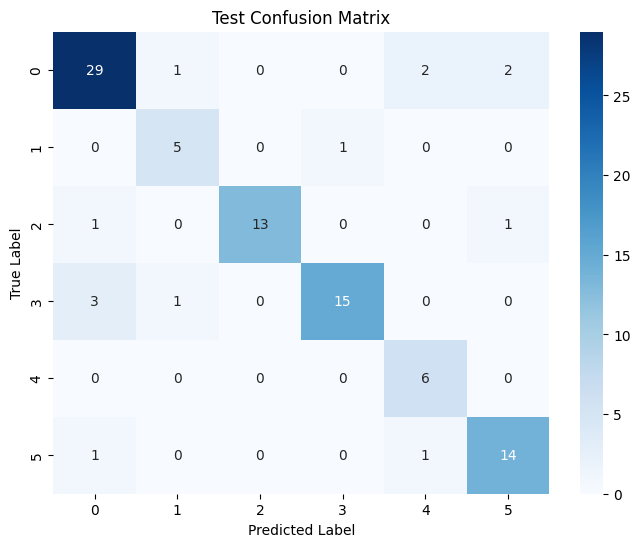

In [60]:
# Classification Report
print("Test Classification Report:")
print(classification_report(test_labels, test_preds))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(6), yticklabels=range(6))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()


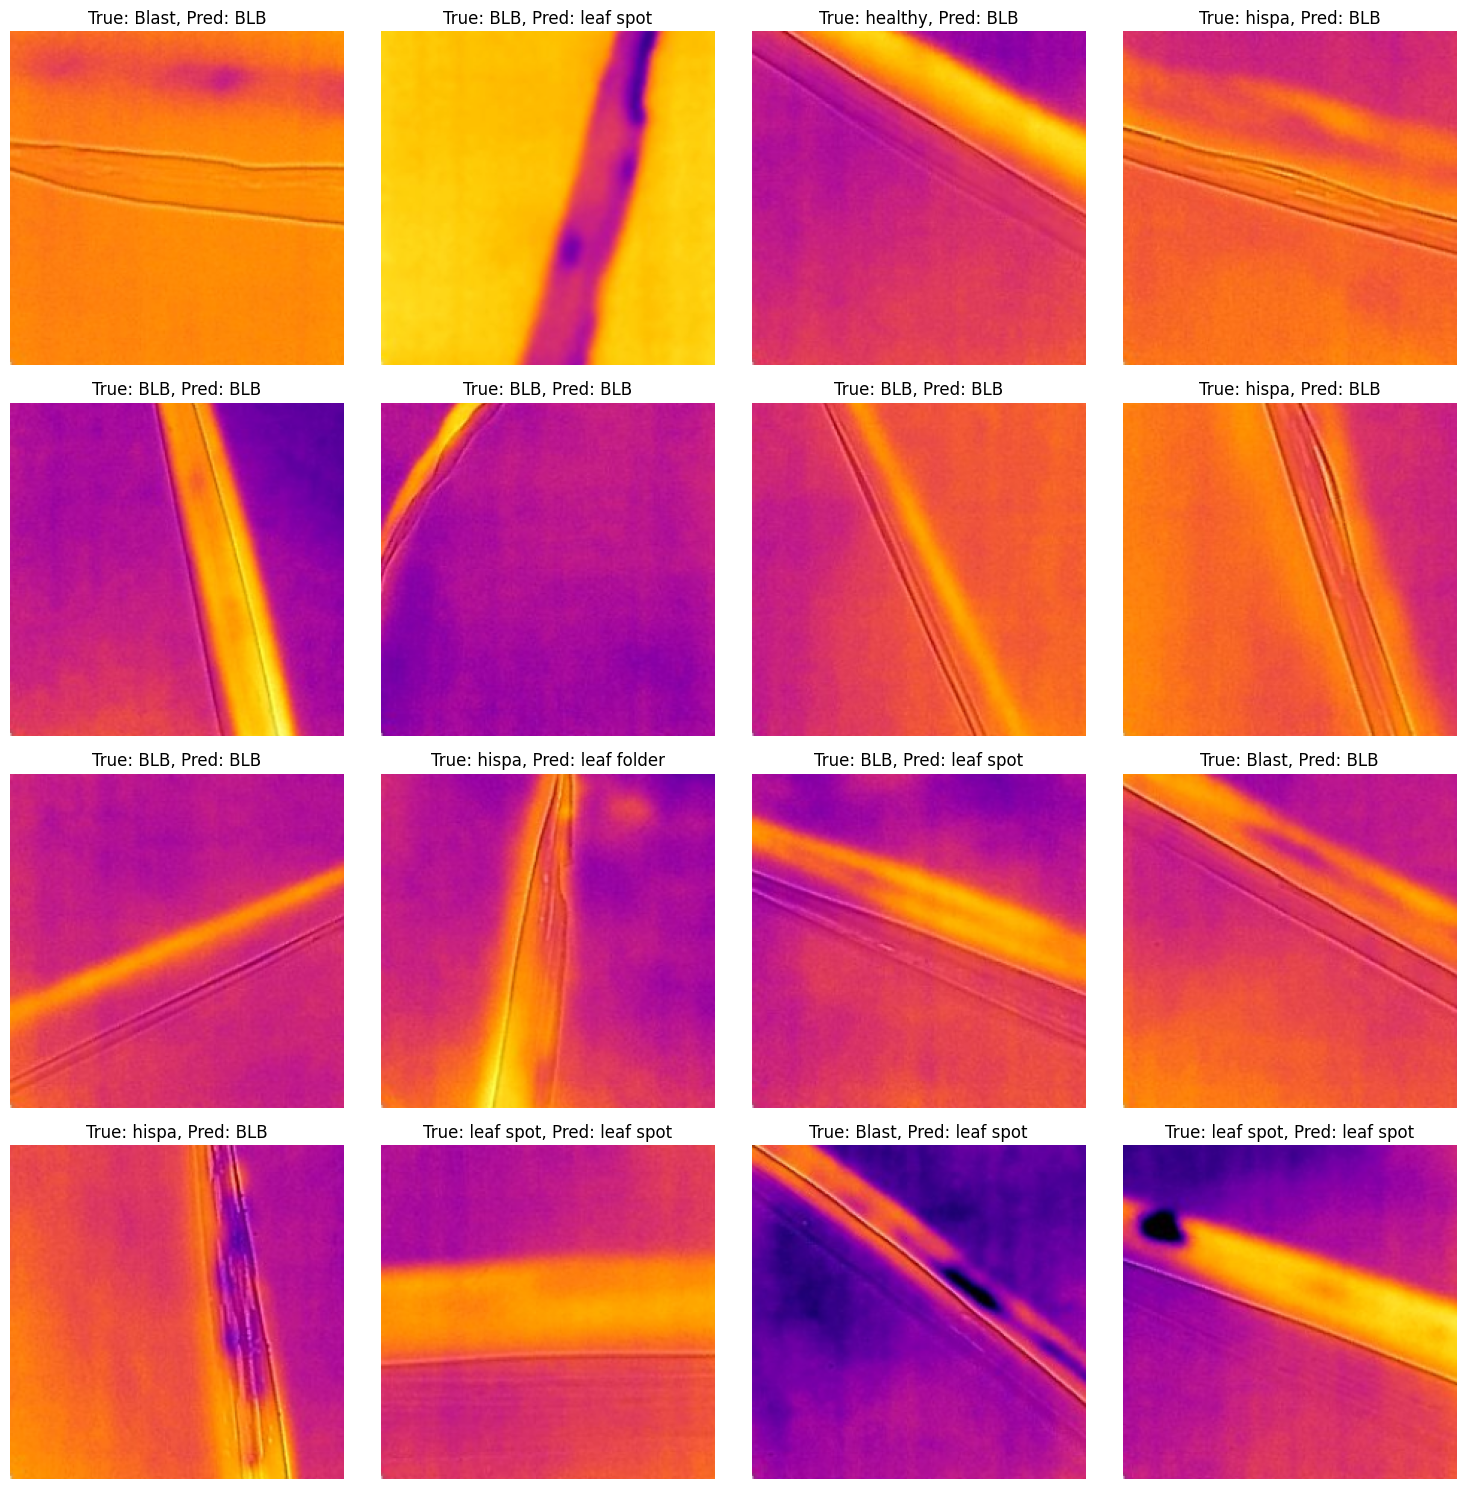

In [64]:
import matplotlib.pyplot as plt
import random
import torch
from torchvision import datasets, transforms
import numpy as np

# Function to display the images and predictions
def display_images_with_predictions(model, test_dataloader, device, num_images=16):
    model.eval()  # Set the model to evaluation mode

    # Get a batch of random images from the test set
    data_iter = iter(test_dataloader)
    images, labels = next(data_iter)

    # Move images and labels to the correct device (CPU or GPU)
    images, labels = images.to(device), labels.to(device)

    # Get the predictions from the model
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Convert predictions and true labels to numpy for easier display
    predicted = predicted.cpu().numpy()
    labels = labels.cpu().numpy()

    # Randomly select 16 images to display
    indices = random.sample(range(len(images)), num_images)

    # Plot the images and predictions
    fig, axes = plt.subplots(4, 4, figsize=(15, 15))
    axes = axes.flatten()

    for i, idx in enumerate(indices):
        image = images[idx].cpu().numpy().transpose((1, 2, 0))  # Convert from tensor to numpy for plotting
        image = np.clip(image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)  # De-normalize

        true_label = labels[idx]
        pred_label = predicted[idx]

        # Get class names from the dataset's folder structure
        class_names = test_dataloader.dataset.classes
        true_label_name = class_names[true_label]
        pred_label_name = class_names[pred_label]

        # Plot image
        axes[i].imshow(image)
        axes[i].set_title(f"True: {true_label_name}, Pred: {pred_label_name}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()



test_dir = '/content/paddy-leaves/thermal images UL'
test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transforms)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)
display_images_with_predictions(model, test_dataloader, device)
